## Original Figure recreation

First, the original figure was recreated using the dataset to evaluate for easy reproducibility and replicability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/AidaCPL/INFOSCI301_Final_Project/refs/heads/main/CR.csv')

In [3]:
# Display column names to identify relevant columns for headline ratings and veracity
data.columns.tolist()

['id',
 'Country',
 'Condition',
 'StartDate',
 'Duration',
 'pass_Screener1',
 'fb',
 'tw',
 'sn',
 'ig',
 'wh',
 'ti',
 'ot',
 'no',
 'pass_Screener2',
 'political',
 'sports',
 'celebrity',
 'science',
 'business',
 'other',
 'none',
 'pass_Attention1',
 'rating_1',
 'rating_2',
 'rating_3',
 'rating_4',
 'rating_5',
 'rating_6',
 'rating_7',
 'rating_8',
 'rating_9',
 'rating_10',
 'rating_11',
 'rating_12',
 'rating_13',
 'rating_14',
 'rating_15',
 'rating_16',
 'rating_17',
 'rating_18',
 'rating_19',
 'rating_20',
 'rating_21',
 'rating_22',
 'rating_23',
 'rating_24',
 'rating_25',
 'rating_26',
 'rating_27',
 'rating_28',
 'rating_29',
 'rating_30',
 'rating_31',
 'rating_32',
 'rating_33',
 'rating_34',
 'rating_35',
 'rating_36',
 'rating_37',
 'rating_38',
 'rating_39',
 'rating_40',
 'rating_41',
 'rating_42',
 'rating_43',
 'rating_44',
 'rating_45',
 'CRT',
 'CRTi',
 'CRTw',
 'pass_Attention2',
 'imp_accuracy',
 'imp_surprising',
 'imp_interesting',
 'imp_pol_aligned',


In [4]:
# Map the ratings to true and false categories based on the provided veracity mapping
true_headline_ids = list(range(31, 46))  # IDs for true headlines
false_headline_ids = list(range(1, 31))  # IDs for false headlines

# Extract columns for ratings and map them to veracity
rating_columns = [col for col in data.columns if col.startswith('rating_')]

# Melt the data to a long format for easier grouping and analysis
ratings_long = data.melt(id_vars=['Country'], value_vars=rating_columns,
                         var_name='Headline', value_name='Rating')

# Extract the numeric part of the headline identifier
ratings_long['Headline_ID'] = ratings_long['Headline'].str.extract('(\d+)').astype(int)

# Assign veracity labels based on the headline ID
ratings_long['Veracity'] = ratings_long['Headline_ID'].apply(
    lambda x: 'True' if x in true_headline_ids else 'False'
)

# Drop rows with missing ratings
ratings_long = ratings_long.dropna(subset=['Rating'])

# Aggregate by country and veracity
aggregated_data = ratings_long.groupby(['Country', 'Veracity']).agg(
    Mean_Rating=('Rating', 'mean'),
    Std_Error=('Rating', 'sem')
).reset_index()
aggregated_data

,Country,Veracity,Mean_Rating,Std_Error
0,ar,False,2.590040,0.011755
1,ar,True,3.661166,0.011705
2,au,False,2.458379,0.011714
3,au,True,3.192569,0.012136
4,br,False,2.173340,0.011298
5,br,True,3.556054,0.012773
6,cn,False,2.836892,0.009872
7,cn,True,3.669860,0.009578
8,eg,False,3.166366,0.012336
9,eg,True,4.149912,0.011221


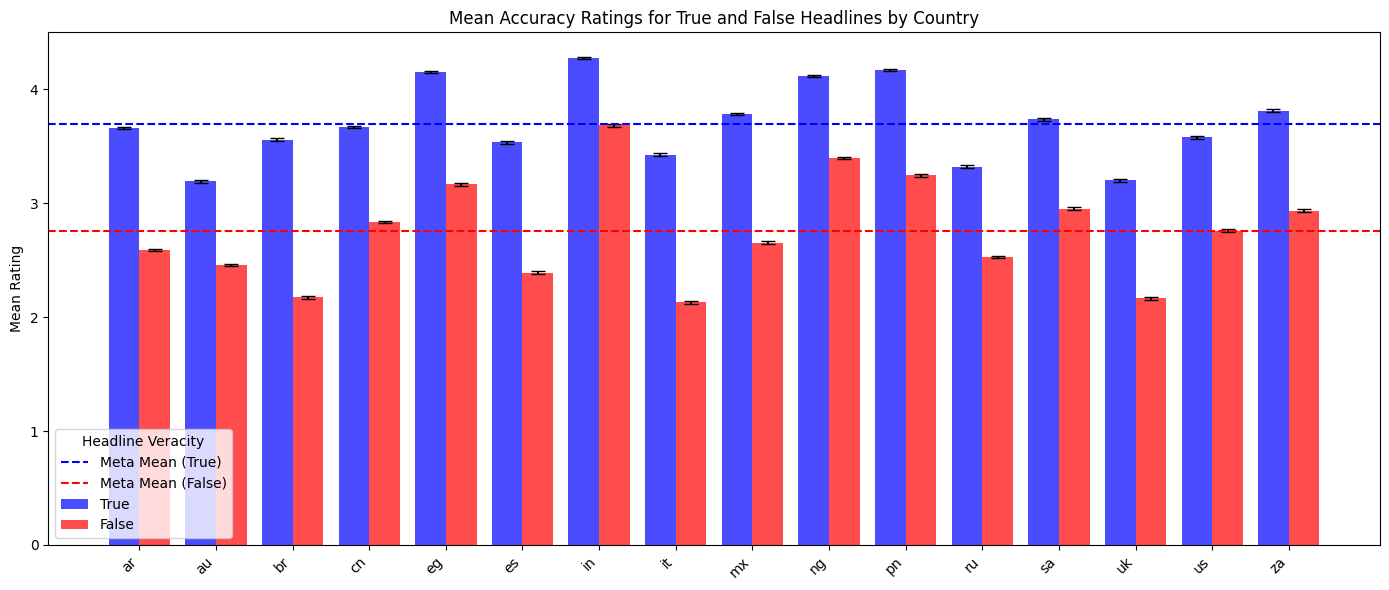

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Map the ratings to true and false categories based on the provided veracity mapping
true_headline_ids = list(range(31, 46))  # IDs for true headlines
false_headline_ids = list(range(1, 31))  # IDs for false headlines

# Extract columns for ratings and map them to veracity
rating_columns = [col for col in data.columns if col.startswith('rating_')]

# Melt the data to a long format for easier grouping and analysis
ratings_long = data.melt(id_vars=['Country'], value_vars=rating_columns,
                         var_name='Headline', value_name='Rating')

# Extract the numeric part of the headline identifier
ratings_long['Headline_ID'] = ratings_long['Headline'].str.extract('(\d+)').astype(int)

# Assign veracity labels based on the headline ID
ratings_long['Veracity'] = ratings_long['Headline_ID'].apply(
    lambda x: 'True' if x in true_headline_ids else 'False'
)

# Drop rows with missing ratings
ratings_long = ratings_long.dropna(subset=['Rating'])

# Aggregate by country and veracity
aggregated_data = ratings_long.groupby(['Country', 'Veracity']).agg(
    Mean_Rating=('Rating', 'mean'),
    Std_Error=('Rating', 'sem')
).reset_index()

# Pivot the data for easier plotting
pivot_data = aggregated_data.pivot(index="Country", columns="Veracity", values=["Mean_Rating", "Std_Error"])
countries = pivot_data.index
mean_true = pivot_data[("Mean_Rating", "True")]
mean_false = pivot_data[("Mean_Rating", "False")]
error_true = pivot_data[("Std_Error", "True")]
error_false = pivot_data[("Std_Error", "False")]

# Adjust the bar plot so that True and False ratings are displayed side by side

# Plot the figure
fig, ax = plt.subplots(figsize=(14, 6))

# Define bar width for side-by-side bars
bar_width = 0.4
indices = np.arange(len(countries))

# Plot True ratings
ax.bar(indices - bar_width / 2, mean_true, yerr=error_true, capsize=5, color='blue', alpha=0.7, label='True', width=bar_width)

# Plot False ratings
ax.bar(indices + bar_width / 2, mean_false, yerr=error_false, capsize=5, color='red', alpha=0.7, label='False', width=bar_width)

# Set x-axis labels and rotate for clarity
ax.set_xticks(indices)
ax.set_xticklabels(countries, rotation=45, ha='right', fontsize=10)

# Add meta-analytic means (averages across all countries)
meta_mean_true = mean_true.mean()
meta_mean_false = mean_false.mean()
ax.axhline(meta_mean_true, color='blue', linestyle='--', label='Meta Mean (True)')
ax.axhline(meta_mean_false, color='red', linestyle='--', label='Meta Mean (False)')

# Add labels and legend
ax.set_ylabel("Mean Rating")
ax.set_title("Mean Accuracy Ratings for True and False Headlines by Country")
ax.legend(title="Headline Veracity")

plt.tight_layout()
plt.show()


## Redesign Proposal and Execution

Next, I'll create the redesign proposed using the original dataset and trying to tell the same story in a better visualization.

In [7]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df = data

# Define country name mappings and regions
country_names = {
    'ar': 'Argentina', 'au': 'Australia', 'br': 'Brazil', 'cn': 'China',
    'eg': 'Egypt', 'es': 'Spain', 'in': 'India', 'it': 'Italy',
    'mx': 'Mexico', 'ng': 'Nigeria', 'pn': 'Philippines', 'ru': 'Russia',
    'sa': 'Saudi Arabia', 'uk': 'United Kingdom', 'us': 'United States',
    'za': 'South Africa'
}
regions = {
    'Americas': ['ar', 'br', 'mx', 'us'],
    'Europe': ['es', 'it', 'ru', 'uk'],
    'Asia Pacific': ['au', 'cn', 'in', 'pn'],
    'Middle East & Africa': ['eg', 'ng', 'sa', 'za']
}

# Define the mapping for full country names to their codes
country_name_to_code = {v: k for k, v in country_names.items()}

# Calculate ratings and confidence intervals
true_ratings = df[df['Condition'] == 3].groupby('Country')[['rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5']].mean().mean(axis=1)
false_ratings = df[df['Condition'] == 3].groupby('Country')[['rating_6', 'rating_7', 'rating_8', 'rating_9', 'rating_10']].mean().mean(axis=1)
true_ci = df[df['Condition'] == 3].groupby('Country')[['rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5']].sem().mean(axis=1) * 1.96
false_ci = df[df['Condition'] == 3].groupby('Country')[['rating_6', 'rating_7', 'rating_8', 'rating_9', 'rating_10']].sem().mean(axis=1) * 1.96

# Create the figure
fig = go.Figure()

# Add True and False bars for each country
for i, country in enumerate(country_names):
    country_full_name = country_names[country]
    region = next((r for r, c_list in regions.items() if country in c_list), None)  # Find region for the country

    # True headlines
    fig.add_trace(go.Bar(
        name='True Headlines',
        x=[country_full_name],
        y=[true_ratings[country]],
        error_y=dict(type='data', array=[true_ci[country]], visible=True),
        marker_color='rgb(31, 119, 180)',
        width=0.35,
        customdata=[[region]],
        hovertemplate="Country: %{x}<br>Rating: %{y:.2f}<br>Region: %{customdata[0]}<extra></extra>",
        showlegend=True if i == 0 else False,
        offsetgroup=0
    ))

    # False headlines
    fig.add_trace(go.Bar(
        name='False Headlines',
        x=[country_full_name],
        y=[false_ratings[country]],
        error_y=dict(type='data', array=[false_ci[country]], visible=True),
        marker_color='rgb(255, 127, 14)',
        marker_pattern_shape='/',
        width=0.35,
        customdata=[[region]],
        hovertemplate="Country: %{x}<br>Rating: %{y:.2f}<br>Region: %{customdata[0]}<extra></extra>",
        showlegend=True if i == 0 else False,
        offsetgroup=1
    ))

# Initialize the filtering buttons list
buttons = []

# Add the "All Regions" button to show all traces
buttons.append(dict(
    args=[{"visible": [True] * len(fig.data)}],  # Show all traces
    label="All Regions",
    method="update"
))

# Iterate over each region and construct the filtering buttons
for region, countries_in_region in regions.items():
    visibility = []  # To track which traces to show/hide for this region

    # Loop through all traces in the figure
    for trace in fig.data:
        if trace.type == "bar" and trace.x:  # Check if the trace corresponds to a bar
            country_name = trace.x[0]  # Extract full country name
            country_code = country_name_to_code.get(country_name, None)  # Get the country code

            # Check if the country belongs to the current region
            if country_code in countries_in_region:
                visibility.append(True)  # Show the trace
            else:
                visibility.append(False)  # Hide the trace
        else:
            visibility.append(False)  # Hide non-bar traces

    # Add the visibility settings as a button for this region
    if not any(button['label'] == region for button in buttons):  # Avoid duplicates
        buttons.append(dict(
            args=[{"visible": visibility}],
            label=region,
            method="update"
        ))

# Update layout for filtering buttons
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,  # Use the buttons list with no duplicates
        direction="down",
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.1,
        yanchor="top"
    )],
    title="Accuracy Ratings for True and False Headlines by Country",
    xaxis_title="Country",
    yaxis_title="Accuracy Rating",
    barmode='group',
    bargap=0.15,
    bargroupgap=0.02,
    height=600,
    width=1200,
    showlegend=True
)

# Display the interactive figure
fig.show()

### Alternative Redesigns

In [8]:
import plotly.graph_objects as go

# Compute the gap between True and False ratings
rating_diff = true_ratings.values - false_ratings.values

# Create diverging bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=list(country_names.values()),
    y=rating_diff,
    marker_color=["rgb(31, 119, 180)" if diff > 0 else "rgb(255, 127, 14)" for diff in rating_diff],
    name="Rating Difference",
    text=["{:.2f}".format(diff) for diff in rating_diff],
    textposition="outside"
))

fig.update_layout(
    title="Diverging Bar Chart: Difference Between True and False Ratings",
    xaxis_title="Country",
    yaxis_title="Rating Difference (True - False)",
    template="plotly_white",
    height=600,
    width=1200
)

fig.show()
